In [2]:
import json
import geopandas as gpd

In [20]:
import pandas as pd

dummy_fire = pd.DataFrame([[-122.0054482 ,   37.22892986], [-122.0054482 ,   37.22805234], [-122.00457067  , 37.22951488], [-122.00515569 ,  37.22834484], [-122.00574071 ,  37.22980739], [-122.0054482 ,   37.22922237], [-122.00515569  , 37.22863735], [-122.0054482   , 37.22951488], [-122.00515569 ,  37.22892986], [-122.00515569 ,  37.22805234], [-122.0054482   , 37.22980739], [-122.00486318 ,  37.22834484], [-122.00515569 ,  37.22922237], [-122.00457067 ,  37.22922237], [-122.00486318   ,37.22863735], [-122.00515569   ,37.22951488], [-122.00486318 ,  37.22805234], [-122.00574071  , 37.22834484], [-122.00486318  , 37.22892986], [-122.00515569  , 37.22980739], [-122.00603321  , 37.22951488], [-122.00457067 ,  37.22834484], [-122.00574071   ,37.22863735], [-122.00603321  , 37.22980739], [-122.00486318  , 37.22922237], [-122.00457067  , 37.22863735], [-122.00486318  , 37.22951488], [-122.00574071,   37.22892986], [-122.00457067,   37.22892986], [-122.0054482,    37.22834484], [-122.00574071 ,  37.22922237], [-122.0054482,    37.22863735]])

In [ ]:
dummy_fire.columns = ['x','y']
gdf = gpd.GeoDataFrame(
    dummy_fire, geometry=gpd.points_from_xy(dummy_fire.x, dummy_fire.y))
gdf.drop(['x', 'y'], axis=1, inplace=True)

In [22]:
fire_u = gdf.unary_union

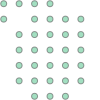

In [23]:
fire_u

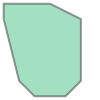

In [24]:
fire_hull = gdf.unary_union.convex_hull
fire_hull

In [ ]:
SC = pd.DataFrame([[37.57023962871226, -122.5463942584929], [37.522313505974715, -121.1485564830215], [36.8723014844421, -120.88410068766201], [36.85618108009037, -122.2491963170413]])
SC.columns = ['x','y']
SC_bounds = gpd.GeoDataFrame(
    SC, geometry=gpd.points_from_xy(SC.y, SC.x))
SC_bounds.drop(['x', 'y'], axis=1, inplace=True)
SC_hull = SC_bounds.unary_union.convex_hull

In [ ]:
import os

directory_in_str = "C:\\Users\\natha\\Documents\\School\\CSE498\\CapstoneExploration\\data"
directory = os.fsencode(directory_in_str)

SC_buildings = gpd.GeoDataFrame()
    
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if "California_x" in filename: 
        buildings = gpd.read_file(filename)
        buildings.drop(["release", "capture_dates_range"], axis=1, inplace=True)
        in_sc = buildings.intersects(SC_hull)
        joinlist = [SC_buildings]
        for i in range(in_sc.shape[0]):
            if in_sc[i]:
                joinlist.append(buildings.iloc[i])
        SC_buildings = gpd.GeoDataFrame(pd.concat(joinlist, ignore_index=True))
                                                
SC_buildings

In [74]:
SC_buildings.to_file('SC_buildings.geojson', driver='GeoJSON')  

In [30]:
SC_buildings = gpd.read_file("SC_buildings.geojson")
SC_buildings.columns = ["geometry"]

In [36]:
damaged = SC_buildings.within(fire_hull)
damaged.value_counts()

False    734205
True          6
dtype: int64

In [37]:
partial_damage = SC_buildings.intersects(fire_hull)
partial_damage.value_counts()

False    734201
True         10
dtype: int64

C:\Users\natha\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


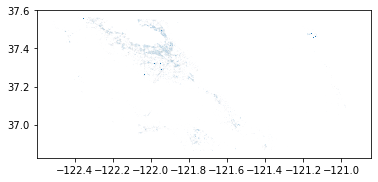

In [18]:
plt = SC_buildings.plot()